# Modelling continuous data with Tensoflow Probability (TFP)

In this notebook you will learn how work with TFP. Kudos goes to 'Lars Bosshard' for starting the translation from python to R. 

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


## Installing TensorFlow Probability

Unfornuately TFP is not installed by default for Kaggle R Kernels (as of 9/15/2022). For more details/background on how to install TFP see https://www.kaggle.com/code/oduerr/tfp-with-r. This installation is for Tensorflow 2.6.5 for other versions you might need to adobt the installation procedure. 

In [2]:
library(reticulate)
use_condaenv("r-reticulate", required = TRUE) #We activate the conda enviroment
py_list_packages("r-reticulate") %>% filter(package %in% c('tensorflow', 'keras', 'tensorflow-probability'))

package,version,requirement,channel
<chr>,<chr>,<chr>,<chr>
keras,2.6.0,keras=2.6.0,pypi
tensorflow,2.6.5,tensorflow=2.6.5,pypi


** **You should see tensorflow 2.6.5** **

In [3]:
py_install('tensorflow_probability==0.14.1', pip=TRUE, envname="r-reticulate") #Installs the correct python version of TFP
py_list_packages("r-reticulate") %>% filter(package %in% c('tensorflow', 'keras', 'tensorflow-probability'))

package,version,requirement,channel
<chr>,<chr>,<chr>,<chr>
keras,2.6.0,keras=2.6.0,pypi
tensorflow,2.6.5,tensorflow=2.6.5,pypi
tensorflow-probability,0.14.1,tensorflow-probability=0.14.1,pypi


** **You should see tensorflow-probability** **

In [4]:
install.packages("tfprobability") #This installs the R-wrappers of TFP

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
library(keras)
library(tensorflow)
library(tfprobability)
d = tf$version
d$VERSION #2.6.5
tf$test$gpu_device_name() #If '/device:GPU:0' you are on a GPU. You don't need a GPU for this example

Loaded Tensorflow version 2.6.5



[1] "2.6.5"

[1] ""

## Working with a TFP distribution (Introduction)

### First Steps with distributions
Here you can see how to work with distributions in TFP. All distributions are similar, we start with a normal.

In [11]:
try(d <- tfd_normal(loc = 1.0, scale = 0.1) )# This is a strange hack to get rid of a stupid error message
d  = tfd_normal(loc = 1.0, scale = 0.1) # Create a normal distribution with mu=1 and sigma=0.1
(s = tfd_sample(d,2)) # Draw two random points, note we have tensor 
as.numeric(s) # Now, we have numeric values
s$numpy()     # Alternative use when as.numeric() makes troubles
tfd_prob(d, 3) #Compute density/mass.
tfd_cdf(d, 3) #Compute CDF
tfd_mean(d) #Compute mean (expectation)
tfd_stddev(d) #Compute std

#Alternatively (for all above)
tfd_mean(d)
d$mean()

tf.Tensor([1.0915153 1.0968095], shape=(2), dtype=float32)

[1] 1.091515 1.096810

[1] 1.091515 1.096810

tf.Tensor(0.0, shape=(), dtype=float32)

tf.Tensor(1.0, shape=(), dtype=float32)

tf.Tensor(1.0, shape=(), dtype=float32)

tf.Tensor(0.1, shape=(), dtype=float32)

tf.Tensor(1.0, shape=(), dtype=float32)

tf.Tensor(1.0, shape=(), dtype=float32)

### Simple Plotting
Let's evaluate and plot the normal distribution and a Poisson distribution.

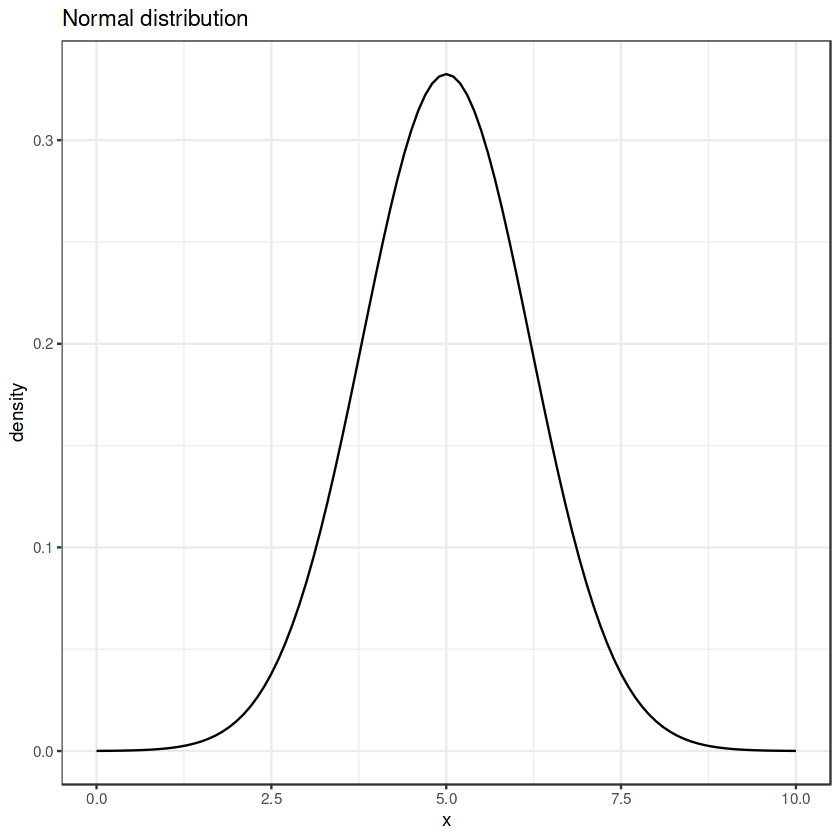

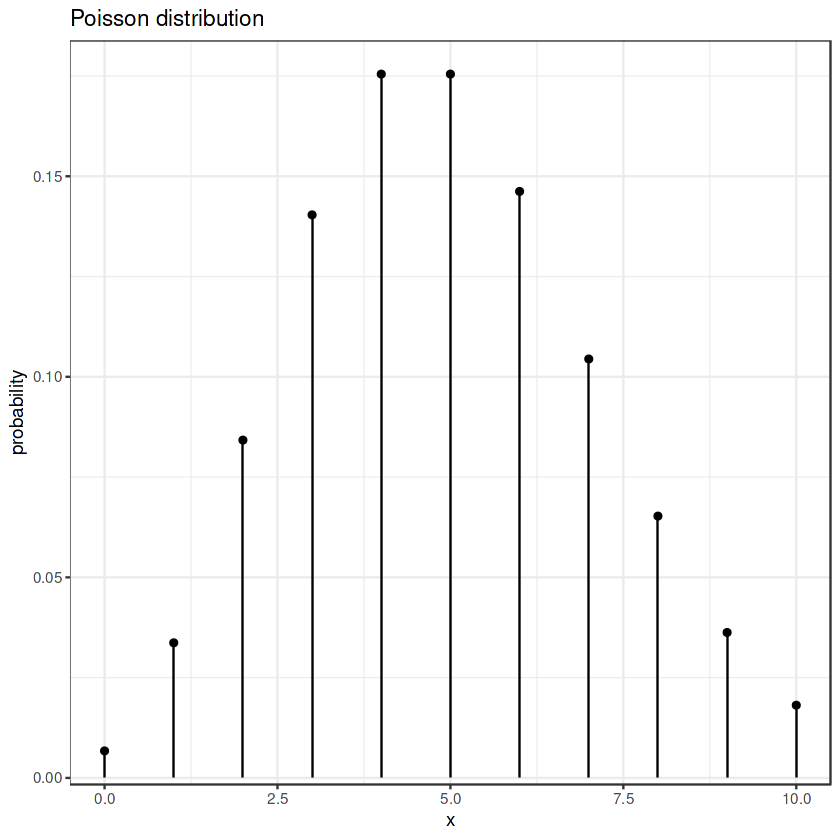

In [8]:
d <- tfd_normal(loc = 5, scale = 1.2)
px <- tfd_prob(d,seq(0,10,by=0.1))

dp <- tfd_poisson(rate = 5)
ppx <- tfd_prob(dp,seq(0,10,by=1))

data.frame(x=seq(0,10,by=0.1),density=as.numeric(px)) %>%
  ggplot(aes(x=x,y=density)) +
  geom_line() +
  ggtitle("Normal distribution") +
  theme_bw()

data.frame(x=seq(0,10,by=1),probability=as.numeric(ppx)) %>%
  ggplot(aes(x=x,y=probability)) +
  geom_point() +
  geom_linerange(aes(ymax=probability), ymin=0) + 
  ggtitle("Poisson distribution") +
  theme_bw()

**Question**: Use TFP to determine the mean and variance of the Poisson distribution from above (with rate=5).
.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


.

.

.

.

.

.

.

.

.

Solution:

In [9]:
tfd_mean(dp)
tfd_variance(dp)

tf.Tensor(5.0, shape=(), dtype=float32)

tf.Tensor(5.0, shape=(), dtype=float32)

### Distributions are TensorFlow Objects [advanced. Optional]
The distributions are tensor, so we can use all the magic of TensorFlow ecosystem. For example start with the cdf and take the derivative to get the pdf. You can skip this in the first reading if you like.

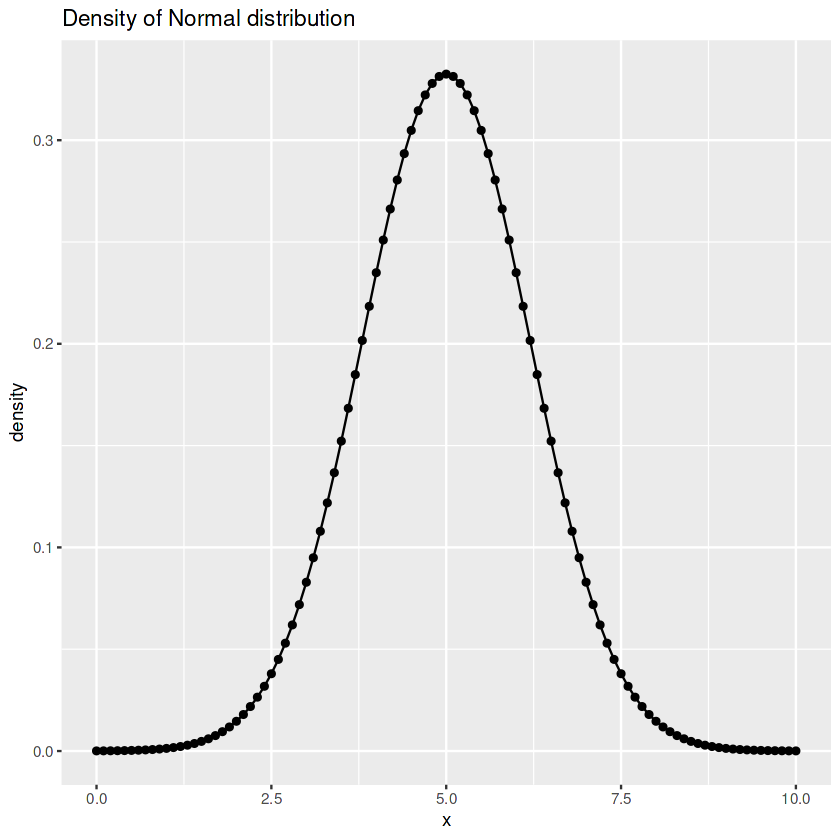

In [10]:
d <- tfd_normal(loc = 5, scale = 1.2)
xs = tf$Variable(seq(0,10,by=0.1), dtype='float32') #We need proper Tensor as x-values
with(tf$GradientTape() %as% t, {
  #In this part of the code stores information (in the tape t) to calculate the gradient
  cdf <- tfd_cdf(d,xs)
})
grads = t$gradient(cdf, xs) #We ask the tape to get gradient of cds w.r.t. xs
xs_vals = xs$numpy() #A working alternative to as.numeric()

data.frame(x=xs_vals,density=as.numeric(grads)) %>%
  ggplot(aes(x=x,y=density)) +
  geom_line() +
  geom_point(data=data.frame(x=xs_vals, y=as.numeric(px)), mapping=aes(x=x,y=y)) +
  ggtitle("Density of Normal distribution") 

In [74]:
sessionInfo()

R version 4.0.5 (2021-03-31)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 20.04.4 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas-pthread/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/openblas-pthread/liblapack.so.3

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] tfprobability_0.15.1 tensorflow_2.9.0     keras_2.6.0         
 [4] reticulate_1.26      forcats_0.5.2        stringr_1.4.1       
 [7] dplyr_1.0.10         purrr_0.3.4          readr_2.1.2         
[10] tidyr_1.2.1          tibble_3.1.8         ggp